# CSE 514A Programming Assignment 1


# Introduction

## Your description/formulation of the problem
For the assignment, I will be using mini batch gradient descent to fit univariate and multivariate linear regression models to UCI Machine Learning Repository's Concrete Compressive Strenght Dataset. The dataset consists of 8 input variables (cement, blast furnace slage, fly ash, water, superplasticizer, coarse aggregate, fine aggregate, age) and 1 output variable of concrete compressive strength. The dataset has 1030 instances and I will be using 900 instances for training and 130 instances for testing. The project may help assess concrete strength in current construction projects and to improve concrete strength in further projects. 


## A description of how you normalized or standardized your data
The data was transformed using numpy's log transformation and sklearn's standardization and normalization packages. Out of the three processed dataset, I chose to use normalized dataset for the project. As you will see in the upcoming figures, I ran the ANOVA analysis on both raw data and normalized dataset, where there were no changes in p-values of normalized dataset from raw dataset. 

## The details of your algorithm
I will be using mini batch gradient descent with batch size of 100, randomly selecting for each iteration. The stopping criterion will be the maximum iteration of 10000 and I will initialized m and b as 1. The loss function of the algorithm is Mean Squared Error function.

## Pseudo-code of your algorithm
    m, b = random

    Repeat while iterations < 10000:

        Randomly select 100 samples

        new_m = old_m - (learning rate / batch_size * dL/dm)

        new_b = old_b - (learning rate / batch_size * dL/dm)

        old_m = new_m

        old_b = new_b
        
    return new_m, new_b



In [360]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import preprocessing
import random
from torch.utils.data import DataLoader
from sklearn.metrics import mean_squared_error

## A) Data Pre-processing

Pre-process the attribute values of your data by normalizing or standardizing each variable. Keep a copy that was not pre-processed, so you can analyze the effect that pre-processing the data has on the optimization.

#### Raw data

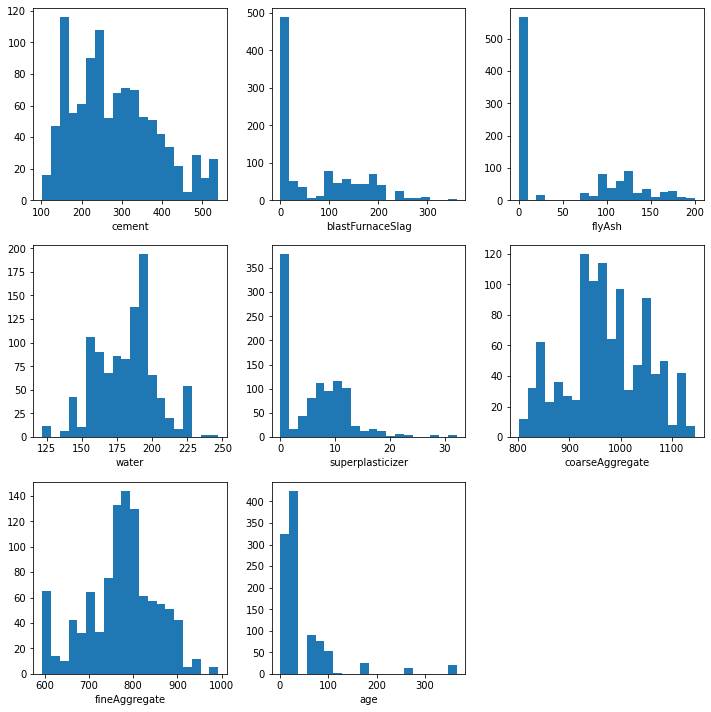

,cement,blastFurnaceSlag,flyAsh,water,superplasticizer,coarseAggregate,fineAggregate,age,concreteCompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [361]:
# raw data
headerlist = ['cement', 'blastFurnaceSlag', 'flyAsh', 'water', 'superplasticizer', 'coarseAggregate', 'fineAggregate', 'age', 'concreteCompressiveStrength']
data_old = pd.read_excel('Concrete_Data.xls', names=headerlist)

# plot raw data
plt.figure(figsize=(10, 10))
for i in range(8):
    plt.subplot(3, 3, i+1)
    plt.hist(data_old[headerlist[i]], bins=20)
    plt.xlabel(headerlist[i])
plt.tight_layout()
plt.show()

data_old = pd.DataFrame(data_old)
display(data_old)

#### ANOVA Analysis of raw data

In [362]:
model=ols(formula='concreteCompressiveStrength ~ cement + blastFurnaceSlag + flyAsh + water + superplasticizer + coarseAggregate + fineAggregate + age', data=data_old).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
display(anova_table)

,sum_sq,df,F,PR(>F)
cement,21533.275004,1.0,199.093007,1.962842e-41
blastFurnaceSlag,11352.522594,1.0,104.963498,1.633083e-23
flyAsh,5281.328920,1.0,48.830271,5.029952e-12
water,1513.408558,1.0,13.992719,1.937337e-04
superplasticizer,1046.296383,1.0,9.673879,1.920901e-03
coarseAggregate,398.413243,1.0,3.683661,5.522656e-02
fineAggregate,383.539878,1.0,3.546145,5.996805e-02
age,47905.186982,1.0,442.923230,5.841045e-82
Residual,110428.156817,1021.0,NaN,NaN


#### Pre-processed data

#### 1. Log Transformation

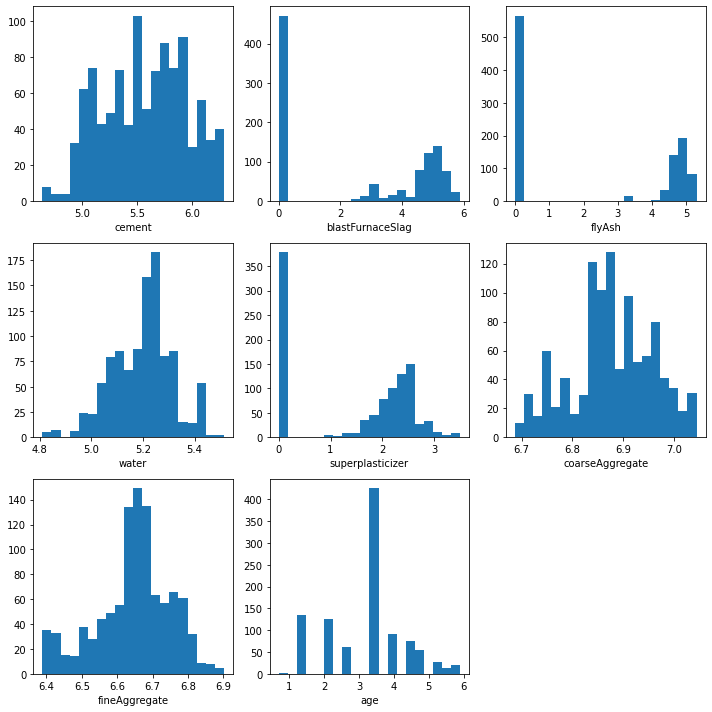

In [363]:
# log transform
data_log=np.log((data_old+1))
plt.figure(figsize=(10, 10))
plt.title('Log Transform')
for i in range(8):
    plt.subplot(3, 3, i+1)
    plt.hist(data_log[headerlist[i]], bins=20)
    plt.xlabel(headerlist[i])
plt.tight_layout()
plt.show()

#### 2. Normalization

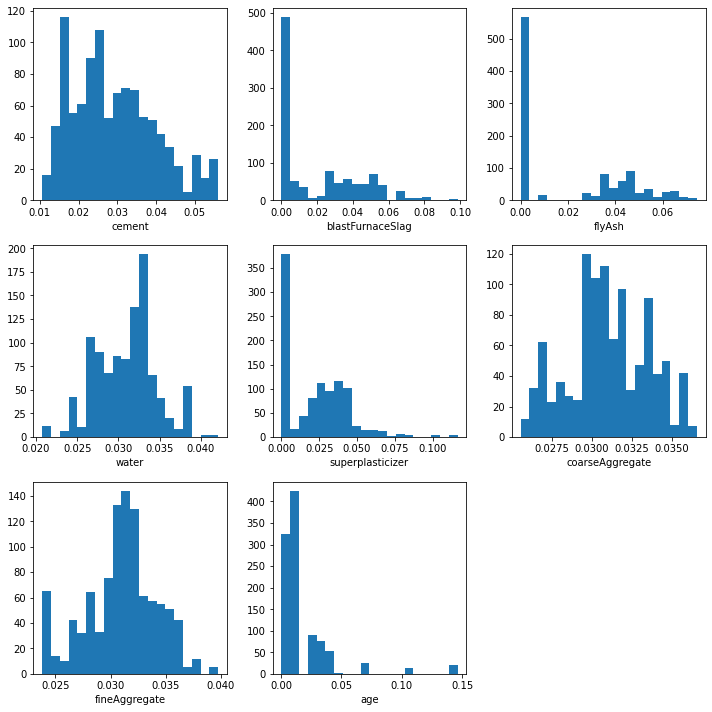

In [364]:
# normalization
data_normalized = pd.DataFrame(preprocessing.normalize(data_old, axis=0), columns=headerlist)
plt.figure(figsize=(10, 10))
plt.title('Normalization')
for i in range(8):
    plt.subplot(3, 3, i+1)
    plt.hist(data_normalized[headerlist[i]], bins=20)
    plt.xlabel(headerlist[i])
plt.tight_layout()
plt.show()

### 3. Standardization

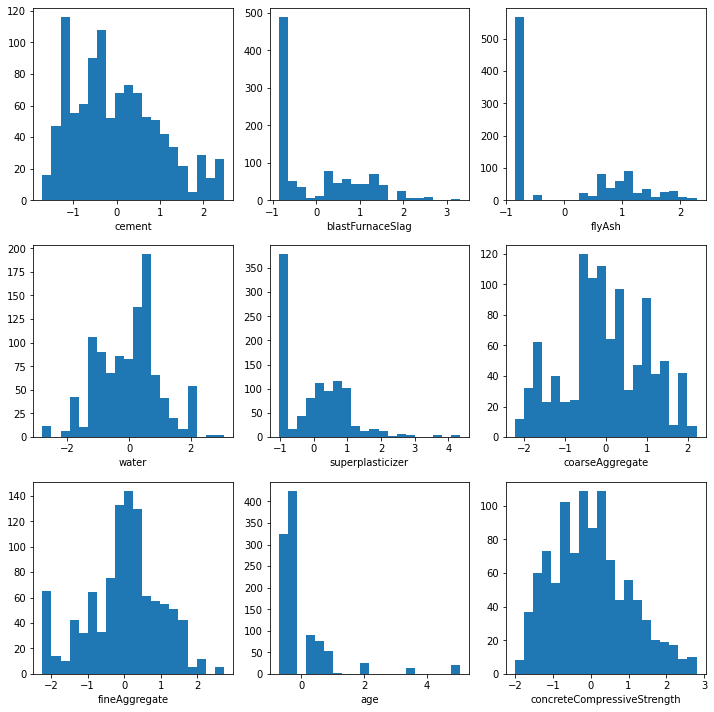

In [365]:
# standardization
data_standardized = pd.DataFrame(preprocessing.scale(data_old), columns=headerlist)
plt.figure(figsize=(10, 10))
plt.title('Standardization')
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.hist(data_standardized[headerlist[i]], bins=20)
    plt.xlabel(headerlist[i])
plt.tight_layout()
plt.show()

### ANOVA analysis on pre-processed data

In [366]:
log_model=ols(formula='concreteCompressiveStrength ~ cement + blastFurnaceSlag + flyAsh + water + superplasticizer + coarseAggregate + fineAggregate + age', data=data_log).fit()
normalized_model=ols(formula='concreteCompressiveStrength ~ cement + blastFurnaceSlag + flyAsh + water + superplasticizer + coarseAggregate + fineAggregate + age', data=data_normalized).fit()
standardized_model=ols(formula='concreteCompressiveStrength ~ cement + blastFurnaceSlag + flyAsh + water + superplasticizer + coarseAggregate + fineAggregate + age', data=data_standardized).fit()


log_anova_table = sm.stats.anova_lm(log_model, typ=2)
normalized_model_anova_table = sm.stats.anova_lm(normalized_model, typ=2)
standardized_model_anova_table = sm.stats.anova_lm(standardized_model, typ=2)

display(log_anova_table)
display(normalized_model_anova_table)
display(standardized_model_anova_table)

,sum_sq,df,F,PR(>F)
cement,32.581142,1.0,576.589776,2.272434e-101
blastFurnaceSlag,9.181933,1.0,162.493028,1.208949e-34
flyAsh,1.252454,1.0,22.164732,2.847219e-06
water,3.502163,1.0,61.977926,8.833088e-15
superplasticizer,1.818778,1.0,32.186983,1.822929e-08
coarseAggregate,0.013616,1.0,0.240957,6.236213e-01
fineAggregate,0.439288,1.0,7.774098,5.398504e-03
age,107.128501,1.0,1895.857350,5.742275e-235
Residual,57.693265,1021.0,NaN,NaN


,sum_sq,df,F,PR(>F)
cement,0.013387,1.0,199.093007,1.962842e-41
blastFurnaceSlag,0.007057,1.0,104.963498,1.633083e-23
flyAsh,0.003283,1.0,48.830271,5.029952e-12
water,0.000941,1.0,13.992719,1.937337e-04
superplasticizer,0.000650,1.0,9.673879,1.920901e-03
coarseAggregate,0.000248,1.0,3.683661,5.522656e-02
fineAggregate,0.000238,1.0,3.546145,5.996805e-02
age,0.029781,1.0,442.923230,5.841045e-82
Residual,0.068650,1021.0,NaN,NaN


,sum_sq,df,F,PR(>F)
cement,77.233135,1.0,199.093007,1.962842e-41
blastFurnaceSlag,40.717954,1.0,104.963498,1.633083e-23
flyAsh,18.942478,1.0,48.830271,5.029952e-12
water,5.428124,1.0,13.992719,1.937337e-04
superplasticizer,3.752738,1.0,9.673879,1.920901e-03
coarseAggregate,1.428984,1.0,3.683661,5.522656e-02
fineAggregate,1.375638,1.0,3.546145,5.996805e-02
age,171.820950,1.0,442.923230,5.841045e-82
Residual,396.071324,1021.0,NaN,NaN


## B) Univariate Linear Regression

In [367]:
class univariate_regression:

    def __init__(self, X_train, X_test, Y_train, Y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test

    def initialize_variables(self):
        m = 1
        b = 1
        return m, b
    
    def make_predicton(self,m, X, b):
        return m*X + b
    
    def mse(self,Y, Y_pred):
        return(1/np.size(Y))*np.sum(np.subtract(Y, Y_pred)**2)

    def gradient_descent(self, X, Y, m, b, alpha, iterations):
        for i in range(iterations):
            index = np.random.choice(np.arange(len(X)), 100, replace=False)
            x_batch = X.iloc[index]
            y_batch = Y.iloc[index]
            Y_pred = self.make_predicton(m, x_batch, b)
            cost=self.mse(y_batch, Y_pred)
            D_m = (-2/np.size(y_batch))*np.sum(np.multiply(X, (y_batch - Y_pred)))
            D_b = (-2/np.size(y_batch))*np.sum(y_batch - Y_pred)
            m = m - alpha*D_m
            b = b - alpha*D_b
        return m, b, cost
    
    def variance_explained(self, Y, Y_pred):
        return 1 - (self.mse(Y, Y_pred)/np.var(Y))
    
    def plot_regression_line(self, X, Y, m, b):
        plt.scatter(X, Y, color="m", marker="o", s=30)
        Y_pred = self.make_predicton(m, X, b)
        plt.plot(X, Y_pred, color="g")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    def run(self, alpha, iterations):
        m, b = self.initialize_variables()
        m, b, cost = self.gradient_descent(self.X_train, self.Y_train, m, b, alpha, iterations)
        Y_pred = self.make_predicton(m, self.X_test, b)
        variance_explained_train=self.variance_explained(self.Y_train, self.make_predicton(m, self.X_train, b))
        variance_explained_test = self.variance_explained(self.Y_test, Y_pred)
        self.plot_regression_line(self.X_train, self.Y_train, m, b)
        return m, b, cost, variance_explained_train, variance_explained_test
    

## C) Multivariate Linear Regression

In [393]:
class multivariate_regression:

    def __init__(self, X_train, X_test, Y_train, Y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test

    def initialize_variables(self):
        m = np.random.rand(9, 1)
        return m
    
    def make_predicton(self,m, X):
        return np.dot(X, m)
    
    def mse(self,Y, Y_pred):
        return(1/np.size(Y))*np.sum(np.subtract(np.squeeze(Y), np.squeeze(Y_pred))**2)

    def gradient_descent(self, X, Y, m, alpha, iterations):
        for i in range(iterations):
            index = np.random.choice(np.arange(len(X)), 100, replace=False)
            x_batch = X.iloc[index]
            y_batch = Y.iloc[index]
            Y_pred = self.make_predicton(m, x_batch)
            cost = self.mse(y_batch, Y_pred)
            D_m = (-2/np.size(y_batch))*np.sum(np.dot(np.subtract(np.squeeze(Y_pred), y_batch), x_batch), axis=0)
            m = m - alpha*D_m
        return m, cost

    def variance_explained(self, Y, Y_pred):
        return 1 - (self.mse(Y, Y_pred)/np.var(Y))
    
    def run(self, alpha, iterations):
        m= self.initialize_variables()
        m, cost = self.gradient_descent(self.X_train, self.Y_train, m, alpha, iterations)
        # self.plot(self.X_test, self.Y_test, m, b)
        Y_pred = self.make_predicton(m, self.X_test)
        variance_explained_train = self.variance_explained(self.Y_train, self.make_predicton(m, self.X_train))
        variance_explained_test = self.variance_explained(self.Y_test, Y_pred)
        return m, cost, variance_explained_train, variance_explained_test
    

# Results

In [369]:
# split data into train and test
X_old_train, X_old_test, y_old_train, y_old_test = train_test_split(data_old[headerlist[0:8]], data_old[headerlist[8]], test_size=130, random_state=0)
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(data_normalized[headerlist[0:8]], data_normalized[headerlist[8]], test_size=130, random_state=0)

X_old_test_multi = X_old_test.copy()
X_old_train_multi = X_old_train.copy()
X_new_test_multi = X_new_test.copy()
X_new_train_multi = X_new_train.copy()

X_old_test_multi.insert(0, 'blank', 1)
X_old_train_multi.insert(0, 'blank', 1)
X_new_test_multi.insert(0, 'blank', 1)
X_new_train_multi.insert(0, 'blank', 1)

## For Univariate Regressions, the scatter plots are presented in order of: 
1. cement
2. blast furnace slag
3. fly ash
4. water
5. superplasticizer
6. coarse aggregate
7. fine aggregate
8. age

## Univariate Regression on Raw Data

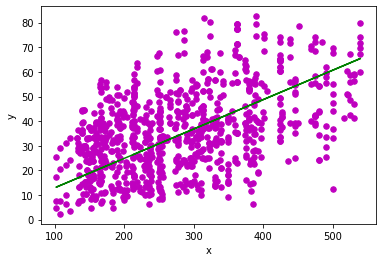

feature:  cement | m:  0.1193348663513901  | b:  0.9975364297766443  | ve on training:  0.1583480572544811  | ve on testing:  0.33155805189680254


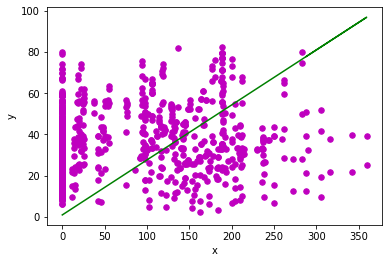

feature:  blastFurnaceSlag | m:  0.26671493324516604  | b:  0.9995702833074347  | ve on training:  -2.261211222519113  | ve on testing:  -2.9241129278205054


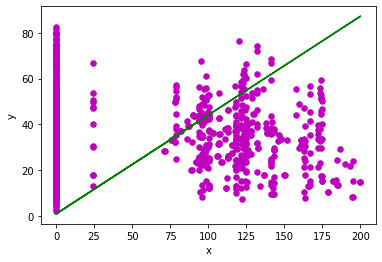

feature:  flyAsh | m:  0.430694822352926  | b:  0.9999049584000448  | ve on training:  -3.5981579818885345  | ve on testing:  -3.168524440180029


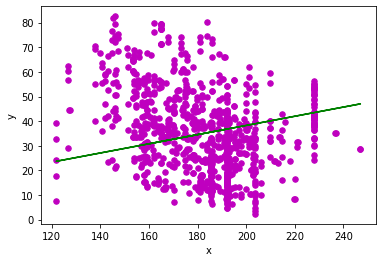

feature:  water | m:  0.18633043791843062  | b:  0.9957950777914292  | ve on training:  -0.19722131707494928  | ve on testing:  -0.20530275428137146


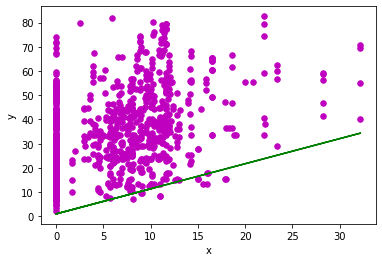

feature:  superplasticizer | m:  1.0354788581287946  | b:  1.0056951793530127  | ve on training:  -2.7469305644193915  | ve on testing:  -2.8240541180608685


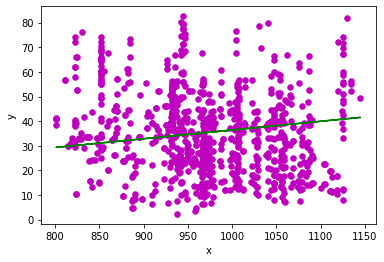

feature:  coarseAggregate | m:  0.03539957795343991  | b:  0.9990982117574946  | ve on training:  -0.07946183509310045  | ve on testing:  -0.09973294005840283


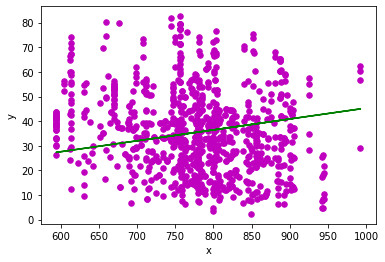

feature:  fineAggregate | m:  0.04430951428846714  | b:  0.9989131787596851  | ve on training:  -0.12156446048209646  | ve on testing:  -0.08875811684669266


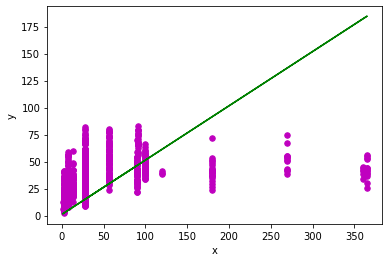

feature:  age | m:  0.502737301742644  | b:  1.0003996974516374  | ve on training:  -2.9734207072640495  | ve on testing:  -2.139497413341713


In [370]:
for i in ['cement', 'blastFurnaceSlag', 'flyAsh', 'water', 'superplasticizer', 'coarseAggregate', 'fineAggregate', 'age']:
    model = univariate_regression(X_old_train[i], X_old_test[i], y_old_train, y_old_test)
    m, b, cost, ve1, ve2 = model.run(0.00000001, 10000)
    print('feature: ', i, '| m: ', m, ' | b: ', b, ' | ve on training: ', ve1, ' | ve on testing: ', ve2)


## Univariate Regression on Normalized Data

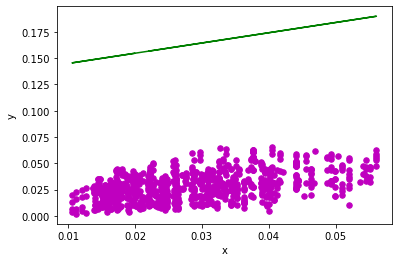

feature:  cement | m:  0.9748738316929375  | b:  0.1351888949925949  | ve on training:  -105.32055468438912 | ve on testing:  -107.96721647071331


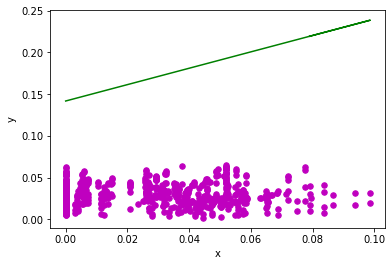

feature:  blastFurnaceSlag | m:  0.9810108794875301  | b:  0.14187836602536627  | ve on training:  -106.44898592179136 | ve on testing:  -98.93705867930109


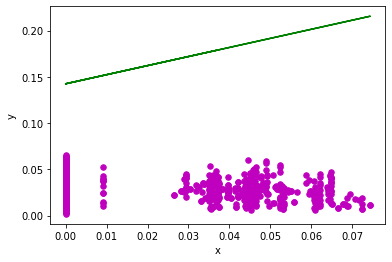

feature:  flyAsh | m:  0.9814740577167754  | b:  0.1425159655639809  | ve on training:  -107.36730645954162 | ve on testing:  -105.88171953209


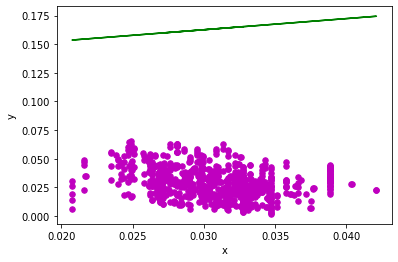

feature:  water | m:  0.9730714237500486  | b:  0.13346273292272634  | ve on training:  -106.03308390063744 | ve on testing:  -104.97395458604667


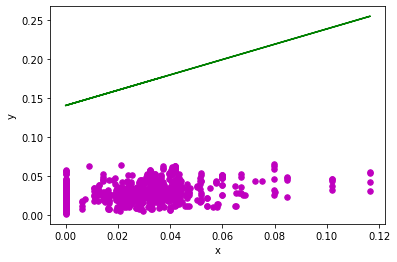

feature:  superplasticizer | m:  0.980008761655148  | b:  0.1406001154560718  | ve on training:  -105.62714351579743 | ve on testing:  -105.13093820803077


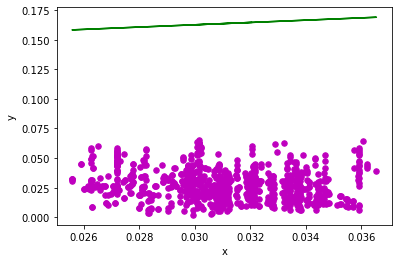

feature:  coarseAggregate | m:  0.9731307375737153  | b:  0.13348708766308845  | ve on training:  -105.89041388726197 | ve on testing:  -106.59994141258848


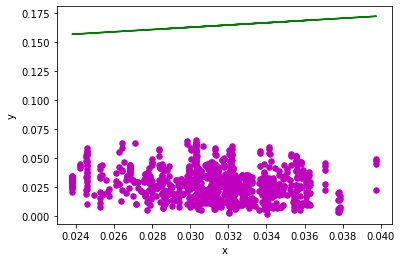

feature:  fineAggregate | m:  0.973083302399266  | b:  0.13346859991711663  | ve on training:  -105.97034022466914 | ve on testing:  -105.32273583390895


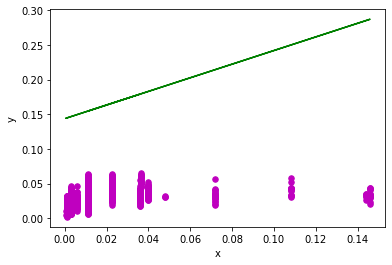

feature:  age | m:  0.9829466419195355  | b:  0.1438036096804045  | ve on training:  -106.01768530320156 | ve on testing:  -99.19489660016268


In [371]:
for i in ['cement', 'blastFurnaceSlag', 'flyAsh', 'water', 'superplasticizer', 'coarseAggregate', 'fineAggregate', 'age']:
    model = univariate_regression(X_new_train[i], X_new_test[i], y_new_train, y_new_test)
    m, b, cost, ve1, ve2 = model.run(0.0001, 10000)
    print('feature: ', i, '| m: ', m, ' | b: ', b, ' | ve on training: ', ve1, '| ve on testing: ', ve2)

## Multivariate Regression on Raw Data

In [397]:
multi_old=multivariate_regression(X_old_train_multi, X_old_test_multi, y_old_train, y_old_test)
m, cost, ve1, ve2 = multi_old.run(0.0000000000001, 10000)
print('m: ', m, ' | ve on training data: ', ve1, ' | ve on testing data: ', ve2)

m:  [[0.4423043 ]
 [0.54249958]
 [0.43991941]
 [0.34342713]
 [0.61463137]
 [0.32379464]
 [0.16565134]
 [0.00783305]
 [0.24212799]]  | ve on training data:  -763.9487886927612  | ve on testing data:  -767.263020861185


## Multivariate Regression on Normalized Data

In [392]:
multi_new=multivariate_regression(X_new_train_multi, X_new_test_multi, y_new_train, y_new_test)
m, cost, ve1, ve2 = multi_new.run(0.000000001, 10000)
print('m: ', m, '| ve on training data: ', ve1, '| ve on testing data: ', ve2)

m:  [[0.64189768]
 [0.91933479]
 [0.80263674]
 [0.09838758]
 [0.42169587]
 [0.62507996]
 [0.14480074]
 [0.05003241]
 [0.57070747]] | ve on training data:  -2851.8712364344956 | ve on testing data:  -2814.6108500503387


# Discussion

## Compare and contrast your models

Overall, my models did not show much difference in terms of predicting training data and testing data as seen from not much difference in variance explained from both data. However, the overall models performed very poorly in normalized data. I believe I would have to train the model for a longer period of time with smaller learning rate in a better machine. The models did not show difference in training time between same # of input variables, and had some but negligible difference in multivariate and univariate models. 

I also used lower learning rates in univariate regression models on normalized data for the sake of experimentation of how learning rates actually affect the convergence of the models, and as seen from the above, the models were not performing well with too large of the learning rate. 

## Draw some conclusions about what factors predict concrete compressive strength. What would you recommend for making the hardest possible concrete?

Overall, the greatest predictor of the concrete compressive strength was cement in the concrete. I would highly recommend for more cement for harder concrete. The rest of the components were rarely relevant to the concrete compressive strength as showcased in the figures and variance explained above. 